<a href="https://colab.research.google.com/github/arifarman02/EDA_Russia-Ukraine_conflict/blob/main/Russia_Ukraine_conflict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
russian_equipment = pd.read_json('https://raw.githubusercontent.com/PetroIvaniuk/2022-Ukraine-Russia-War-Dataset/main/data/russia_losses_equipment.json')
russian_personnel  = pd.read_json('https://raw.githubusercontent.com/PetroIvaniuk/2022-Ukraine-Russia-War-Dataset/main/data/russia_losses_personnel.json')

In [ ]:
russian_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [ ]:
russian_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [ ]:
#remove date from russian_personnel
russian_personnel = russian_personnel.drop('date', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
russian_personnel.head()

,day,personnel,personnel*,POW
0,2,2800,about,0
1,3,4300,about,0
2,4,4500,about,0
3,5,5300,about,0
4,6,5710,about,200


In [ ]:
russian_losses = pd.merge(russian_equipment, russian_personnel)
russian_losses.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN,5710,about,200


In [ ]:
#create excel file
#russian_losses.to_excel("Russian losses.xlsx", index=False)

In [ ]:
russian_losses.fillna(0, inplace=True)

In [ ]:
for i in russian_losses['day']:
  russian_losses['Land forces'] = russian_losses['tank']+russian_losses['APC']+russian_losses['field artillery']+russian_losses['MRL']+russian_losses['military auto']+russian_losses['fuel tank']+russian_losses['personnel']+russian_losses['POW']+russian_losses['special equipment']

In [ ]:
for i in russian_losses['day']:
  russian_losses['Air forces'] = russian_losses['aircraft']+russian_losses['helicopter']+russian_losses['drone']+russian_losses['anti-aircraft warfare']+russian_losses['mobile SRBM system']

In [ ]:
for i in russian_losses['day']:
  russian_losses['Sea forces'] = russian_losses['naval ship']

In [ ]:
'''
create a for loop
iterate over each day and create total loss in that day
'''
for i in russian_losses['day']:
  russian_losses['Total'] = russian_losses['aircraft']+russian_losses['helicopter']+russian_losses['tank']+russian_losses['APC']+russian_losses['field artillery']+russian_losses['MRL']+russian_losses['military auto']+russian_losses['fuel tank']+russian_losses['drone']+russian_losses['naval ship']+russian_losses['anti-aircraft warfare']+russian_losses['personnel']+russian_losses['POW']+russian_losses['mobile SRBM system']+russian_losses['special equipment']

In [ ]:
russian_losses.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW,Land forces,Air forces,Sea forces,Total
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,0,0.0,0.0,2800,about,0,3609.0,17.0,2,3628.0
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,0,0.0,0.0,4300,about,0,5395.0,55.0,2,5452.0
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,0,0.0,0.0,4500,about,0,5600.0,55.0,2,5657.0
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,5,0.0,0.0,5300,about,0,6712.0,66.0,2,6780.0
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,7,0.0,0.0,5710,about,200,7420.0,68.0,2,7490.0


In [ ]:
'''
create a for loop
iterate over each day and create cumulative summary of losses
'''
for i in russian_losses['day']:
  russian_losses['Cumulative'] = russian_losses['aircraft'].cumsum()+russian_losses['helicopter'].cumsum()+russian_losses['tank'].cumsum()+russian_losses['APC'].cumsum()+russian_losses['field artillery'].cumsum()+russian_losses['MRL'].cumsum()+russian_losses['military auto'].cumsum()+russian_losses['fuel tank'].cumsum()+russian_losses['drone'].cumsum()+russian_losses['naval ship'].cumsum()+russian_losses['anti-aircraft warfare'].cumsum()+russian_losses['personnel'].cumsum()+russian_losses['POW'].cumsum()+russian_losses['mobile SRBM system'].cumsum()+russian_losses['special equipment'].cumsum()

In [ ]:
russian_losses.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,special equipment,mobile SRBM system,personnel,personnel*,POW,Land forces,Air forces,Sea forces,Total,Cumulative
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,0.0,0.0,2800,about,0,3609.0,17.0,2,3628.0,3628.0
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,0.0,0.0,4300,about,0,5395.0,55.0,2,5452.0,9080.0
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,0.0,0.0,4500,about,0,5600.0,55.0,2,5657.0,14737.0
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,0.0,0.0,5300,about,0,6712.0,66.0,2,6780.0,21517.0
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,0.0,0.0,5710,about,200,7420.0,68.0,2,7490.0,29007.0


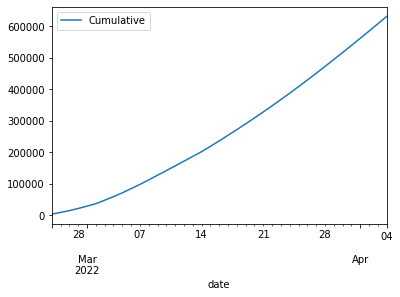

In [ ]:
russian_losses.plot.line(x="date", y="Cumulative")

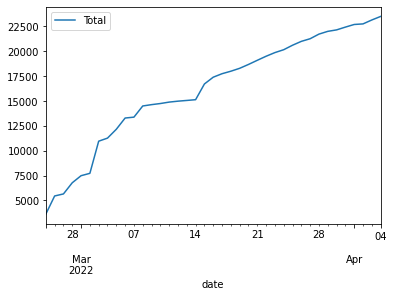

In [ ]:
russian_losses.plot.line(x="date", y="Total")

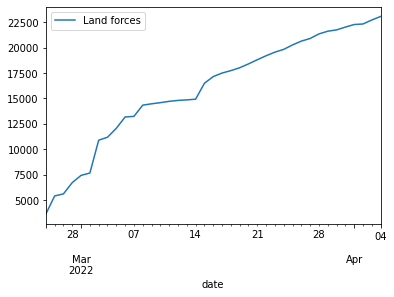

In [ ]:
#land
russian_losses.plot.line(x="date", y="Land forces")

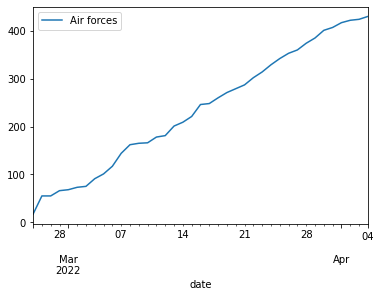

In [ ]:
#air
russian_losses.plot.line(x="date", y="Air forces")

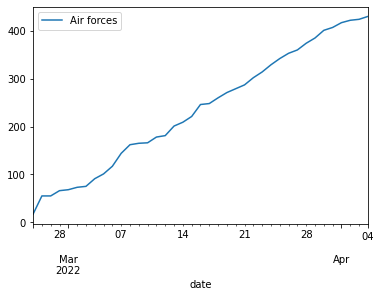

In [ ]:
#sea
russian_losses.plot.line(x="date", y="Air forces")